In [1]:
import os
import nltk
import pandas
import re

### Read Data

In [2]:
classDict = {'neg': 0, 'pos': 1,'ntr': 2}
label2id = []
def read_File():
    sentences = []
    labels = []
    scrip_dir = os.path.dirname(os.path.realpath('__file__'))
    rel_path = "data.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
            word = line.split()
            labels.append(word[0])
            label2id.append(classDict[word[0]])
            sentence = re.sub(word[0]+'\t', '', line)
            sentences.append(sentence)
    print('read file complete')
    
    return sentences, labels

In [3]:
sentences, labels = read_File()


read file complete


### Create pandas dataframe

In [4]:
import pandas as pd

data = {'label': labels,
        'sentence': sentences
        }

df = pd.DataFrame(data, columns = ['label', 'sentence'])

df.head()

,label,sentence
0,pos,একজন বাংলাদেশী হিসাবে আমি গর্বিত । আরও গর্বিত ...
1,neg,"কি বিচিত্র এই দেশ, আর একজন ক্বারি ওবায়দুল্ল..."
2,pos,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...
3,pos,"অভিনন্দন তোমা‌কে মুস্তা‌ফিজ, তু‌মি এর উপযুক্ত..."
4,pos,আলহামদুলিল্লাহ। অভিনন্দন সাতক্ষীরা বাসির অহংকা...


In [5]:
df.describe(include='all')

,label,sentence
count,2449,2449
unique,3,2419
top,neg,আলহামদুলিল্লাহ একজন বাঙ্গালী হিসাবে গর্ব বোধ ক...
freq,1367,3


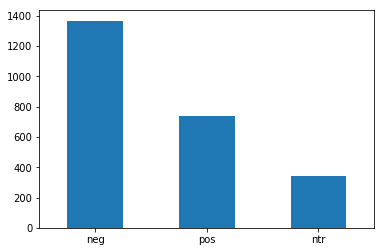

In [7]:
df['label'].value_counts().plot(kind="bar", rot=0)

# Data cleaning

In [8]:
def clean_sentence(sent):
    
    sent = re.sub('[?.`*^()°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', sent)
    sent = re.sub(r'(\W)(?=\1)', '', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', '', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', '', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', '', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', '', sent)
    sent = sent.strip()
    return sent

In [9]:
df.loc[15,'sentence']

'আর একটা কথা না বললেই নয়,আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়।এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে।\n'

In [10]:
for i, sent  in enumerate(df['sentence'].tolist()):
    df.loc[i,'sentence'] = clean_sentence(sent)

In [11]:
test = df.loc[15,'sentence']
test

'আর একটা কথা না বললেই নয়আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে'

### Tokenized Sentence

In [12]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

### Remove stopwords

In [13]:
stop_words = {'এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য'}

def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [14]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor :', test)
print('after :', r_word)

befor : আর একটা কথা না বললেই নয়আই ছি ছি সব সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস হবে
after : আর কথা না বললেই নয়আই ছি ছি সময় বাংলাদেশের বিপক্ষে অবস্থান নেয়এভাবে চলতে থাকলে বাংলাদেশ টিম ধ্বংস


### Word to Vector transformation by ngram approch

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)


df['clean_data'] = [tokenized_data(sent) for sent in df['sentence'].tolist()]

word_vectorizerGram.fit_transform(df['sentence'])
stpGram = word_vectorizerGram.get_feature_names()



print(len(stpGram))

41476


In [16]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['sentence'].tolist()]

word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)

word_vectorizerGram_rsw.fit_transform(df['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()

print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[20])


36688
sample of bigram :  অংশটুকু ফাইন


In [17]:
import numpy as np
def sentence_to_vector_transform(line):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram_rsw)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent

In [18]:
dataForSVM = []
colName = []
def sentence_to_vector(data):
    dataVec = []
    dataVec.append(colName)
    
    for idx, sent in enumerate(data):
        
        sent = sentence_to_vector_transform(sent)
        sentLst = list(sent)
        dtList = []
        try:
            dtList.append(label2id[idx])
            dataForSVM.append(sent)
        except:
            print(idx)
        for item in sentLst:
            dtList.append(item)
        lengthOfEV = len(dtList)
        dataVec.append(dtList)

In [19]:
sentence_to_vector(df['clean_data'])
dataForSVM[0:4]

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]